In [2]:
import pandas as pd
import geopandas as gpd

In [38]:
data_hk_cities = pd.read_csv('Data\Test_predictions.csv')

In [109]:
data_hk_cities.columns

Index(['plz', 'kaufpreis', 'heizkosten', 'baujahr', 'letzte_modernisierung',
       'wohnflaeche', 'grundstuecksflaeche', 'nutzflaeche', 'etage',
       'anzahletagen', 'zimmeranzahl', 'nebenraeume', 'schlafzimmer',
       'badezimmer', 'parkplatzpreis', 'wohngeld', 'ev_kennwert',
       'laufzeittage', 'hits', 'click_schnellkontakte', 'click_customer',
       'click_weitersagen', 'click_url', 'liste_show', 'liste_match',
       'immobilientyp', 'aufzug', 'balkon', 'denkmalobjekt', 'einbaukueche',
       'einliegerwohnung', 'ev_wwenthalten', 'gaestewc', 'garten', 'keller',
       'parkplatz', 'rollstuhlgerecht', 'bauphase', 'ausstattung',
       'energieeffizienzklasse', 'energieausweistyp', 'haustier_erlaubt',
       'heizungsart', 'kategorie_Wohnung', 'objektzustand', 'ergg_1km', 'blid',
       'gid2019', 'kid2019', 'bef1', 'bef2', 'bef10', 'bef9', 'bef8', 'bef7',
       'bef6', 'bef5', 'bef4', 'bef3', 'anbieter', 'duplicateid', 'spell',
       'hits_gen', 'click_schnellkontakte_gen'

In [110]:
len(data_hk_cities)

986641

In [4]:
data_hk_cities[['ergg_1km', 'plz', 'kid2019','wohnflaeche','nutzflaeche','grundstuecksflaeche','kid2019','gid2019']].head()


KeyError: "['grundstuecksflaeche'] not in index"

In [39]:
data_hk_cities[['easting', 'northing']] = data_hk_cities['ergg_1km'].str.split('_', expand=True)
data_hk_cities[['ergg_1km', 'easting', 'northing']].head()


,ergg_1km,easting,northing
0,4428_2782,4428,2782
1,4440_2781,4440,2781
2,4440_2781,4440,2781
3,4434_2784,4434,2784
4,4433_2783,4433,2783


In [124]:
(data_hk_cities['ergg_1km'] == '-9').sum() / len(data_hk_cities)

np.float64(0.05788123542402961)

In [115]:
data_hk_cities[['ergg_1km', 'plz', 'kid2019','wohnflaeche','nutzflaeche','grundstuecksflaeche']].apply(lambda x: x == 'Other missing').sum() / len(data_hk_cities)

ergg_1km               0.000000
plz                    0.000746
kid2019                0.000000
wohnflaeche            0.000000
nutzflaeche            0.729136
grundstuecksflaeche    0.000000
dtype: float64

In [116]:
data_hk_cities.columns

Index(['plz', 'kaufpreis', 'heizkosten', 'baujahr', 'letzte_modernisierung',
       'wohnflaeche', 'grundstuecksflaeche', 'nutzflaeche', 'etage',
       'anzahletagen', 'zimmeranzahl', 'nebenraeume', 'schlafzimmer',
       'badezimmer', 'parkplatzpreis', 'wohngeld', 'ev_kennwert',
       'laufzeittage', 'hits', 'click_schnellkontakte', 'click_customer',
       'click_weitersagen', 'click_url', 'liste_show', 'liste_match',
       'immobilientyp', 'aufzug', 'balkon', 'denkmalobjekt', 'einbaukueche',
       'einliegerwohnung', 'ev_wwenthalten', 'gaestewc', 'garten', 'keller',
       'parkplatz', 'rollstuhlgerecht', 'bauphase', 'ausstattung',
       'energieeffizienzklasse', 'energieausweistyp', 'haustier_erlaubt',
       'heizungsart', 'kategorie_Wohnung', 'objektzustand', 'ergg_1km', 'blid',
       'gid2019', 'kid2019', 'bef1', 'bef2', 'bef10', 'bef9', 'bef8', 'bef7',
       'bef6', 'bef5', 'bef4', 'bef3', 'anbieter', 'duplicateid', 'spell',
       'hits_gen', 'click_schnellkontakte_gen'

In [40]:
data_hk_cities['len_ergg'] = data_hk_cities['ergg_1km'].apply(len) 
data_hk_cities['len_ergg'] 

0        9
1        9
2        9
3        9
4        9
        ..
40432    9
40433    9
40434    9
40435    9
40436    9
Name: len_ergg, Length: 40437, dtype: int64

In [6]:
data_hk_cities[data_hk_cities['len_ergg'] == 9]


KeyError: 'len_ergg'

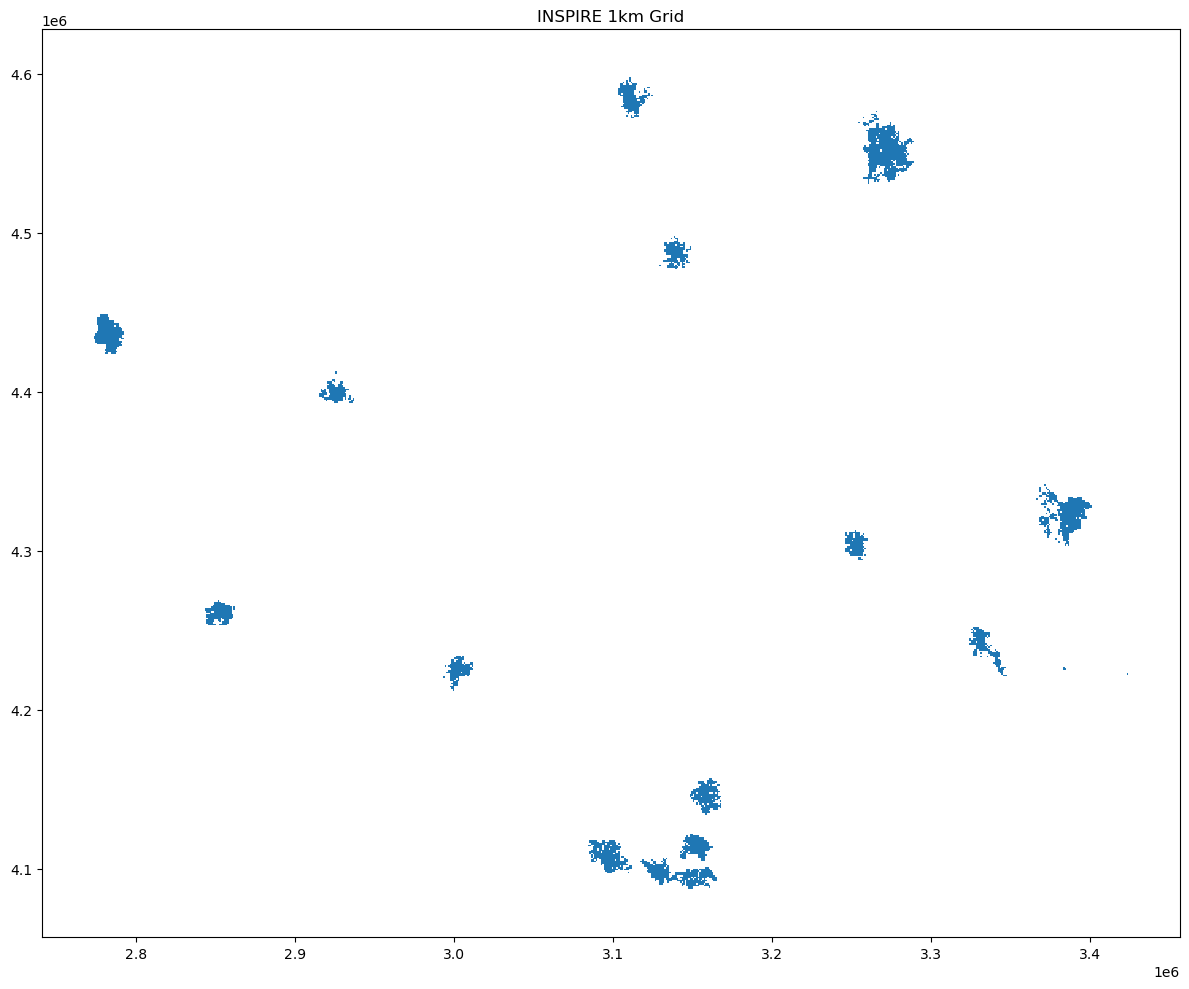

In [119]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box
import numpy as np

# Assuming you have your data in a DataFrame called 'df' with the 'ergg_1km' column
# df = pd.read_csv('your_data.csv')

# First, you need to convert INSPIRE grid codes to geometries
# This is a simplified example - actual conversion depends on the specific INSPIRE grid coding scheme

def inspire_code_to_geometry(code):
    # This function needs to be adapted to your specific INSPIRE grid format
    # Here's a placeholder implementation - you'll need to replace this with the actual logic
    # Example: if code format is like "1kmN3394E4566" extracting northing and easting
    try:
        # Extract coordinates from the code - this is just an example
        # You'll need to adjust based on your actual code format
        parts = code.split('_')
        east = int(parts[1])
        
        north = int(parts[0])
        
        # Create a 1km x 1km box at these coordinates
        return box(east * 1000, north * 1000, (east + 1) * 1000, (north + 1) * 1000)
    except:
        return None

# Create geometries from your grid codes
geometries = data_hk_cities['ergg_1km'].apply(inspire_code_to_geometry)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data_hk_cities, geometry=geometries, crs="EPSG:3035")  # INSPIRE typically uses EPSG:3035

# If you want to visualize some other variable in your dataset
# For example, let's say you have a 'value' column you want to visualize
if 'value' in data_hk_cities.columns:
    fig, ax = plt.subplots(figsize=(12, 10))
    gdf.plot(column='value', cmap='viridis', legend=True, ax=ax)
    plt.title('Grid Visualization')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    # Just visualize the grid itself
    fig, ax = plt.subplots(figsize=(12, 10))
    gdf.plot(ax=ax)
    plt.title('INSPIRE 1km Grid')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [120]:
data_hk_cities['ergg_1km']

obid
42429799     4322_3385
42311647     4317_3385
41405621     4314_3389
39043105     4320_3387
43219451     4322_3384
               ...    
141682083    4487_3135
141245560    4486_3137
139036779    4485_3139
143970732    4486_3136
141076617    4480_3137
Name: ergg_1km, Length: 986641, dtype: object

In [41]:
import os
os.chdir('C:\Eigene Dateien\Datafest\DataFest_GeoChallenge')
os.getcwd()

'C:\\Eigene Dateien\\Datafest\\DataFest_GeoChallenge'

<Axes: >

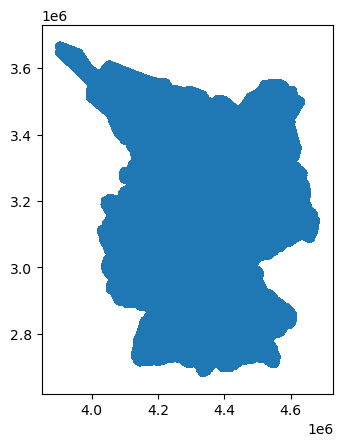

In [122]:
municipal_boundaries = gpd.read_file(f"{os.getcwd()}\Data/Shapefile/Germany_shapefile/de_1km.shp")
municipal_boundaries.plot()

In [42]:
import geopandas as gpd
import pandas as pd

# here I add geometry to the data
data_hk_cities = data_hk_cities[data_hk_cities['len_ergg'] == 9]
data_hk_cities[['x_idx', 'y_idx']] = data_hk_cities['ergg_1km'].str.split('_', expand=True).astype(int)

data_hk_cities['x'] = data_hk_cities['x_idx'] * 1000 + 500  # +500 to center
data_hk_cities['y'] = data_hk_cities['y_idx'] * 1000 + 500

gdf = gpd.GeoDataFrame(
    data_hk_cities,
    geometry=gpd.points_from_xy(data_hk_cities['x'], data_hk_cities['y']),
    crs='EPSG:3035'
)
from shapely.geometry import box

def grid_cell_polygon(x_idx, y_idx):
    x0 = x_idx * 1000
    y0 = y_idx * 1000
    return box(x0, y0, x0 + 1000, y0 + 1000)

data_hk_cities['geometry'] = [grid_cell_polygon(x, y) for x, y in zip(data_hk_cities['x_idx'], data_hk_cities['y_idx'])]

gdf_poly = gpd.GeoDataFrame(data_hk_cities, geometry='geometry', crs='EPSG:3035')

C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14940\682014531.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  munich_grid = grid[grid.intersects(munich.unary_union)].copy()


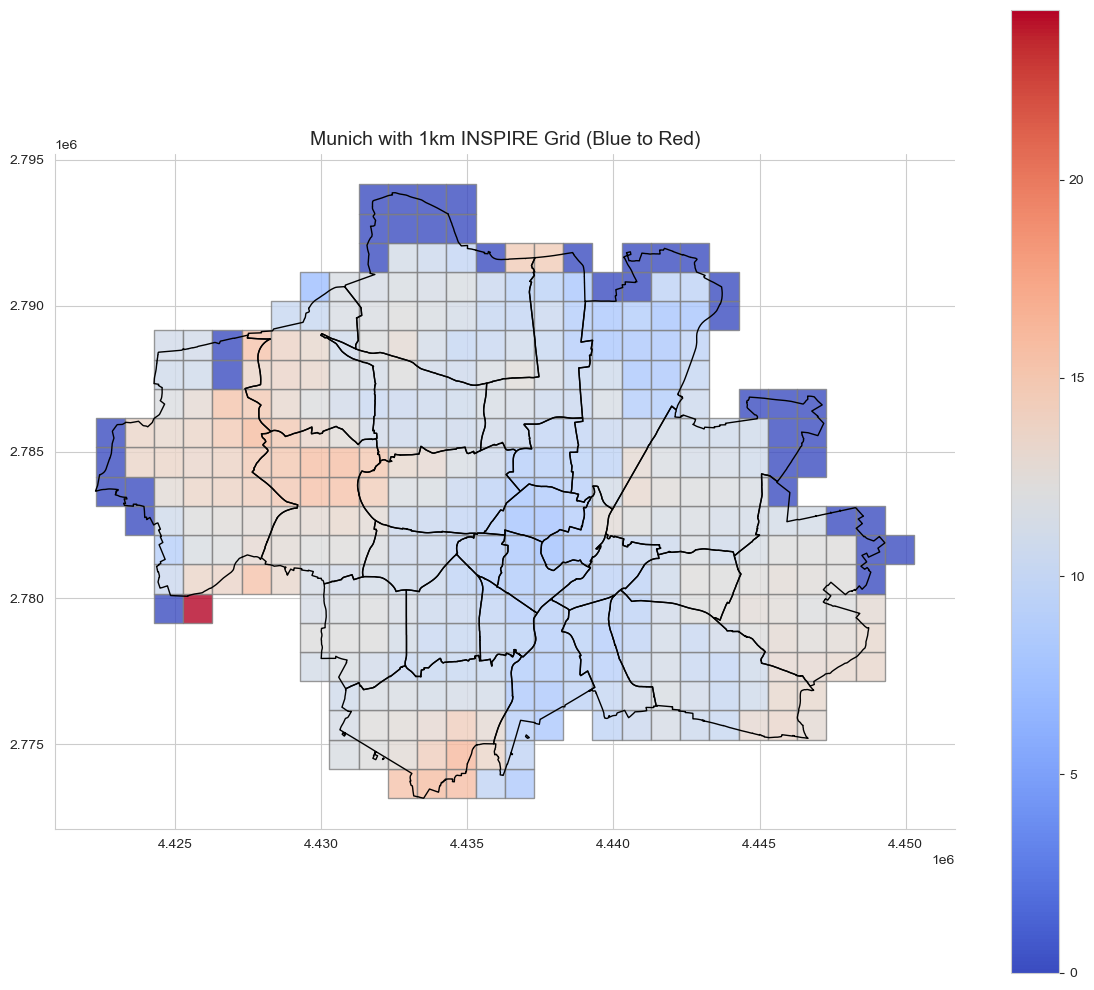

In [73]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
import matplotlib.pyplot as plt
from matplotlib import cm  # Importiere colormap Module

# Lade Munich city districts
munich = gpd.read_file("Data/Shapefile/StadtMuenchen/Muenchen_Stadtbezirke.json")
# Reproject to ETRS89-LAEA (EPSG:3035)
munich = munich.to_crs(epsg=3035)

# Erstelle ein 1km Raster
xmin, ymin, xmax, ymax = munich.total_bounds
cell_size = 1000  # 1km in meters
grid_cells = []
cell_ids = []
for x0 in range(int(xmin), int(xmax + cell_size), cell_size):
    for y0 in range(int(ymin), int(ymax + cell_size), cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(box(x0, y0, x1, y1))
        cell_ids.append(f"1km_{x0 + 500}E_{y0 + 500}N")

# Erstelle GeoDataFrame für das Raster
grid = gpd.GeoDataFrame({'cell_id': cell_ids, 'geometry': grid_cells}, crs="EPSG:3035")

# Behalte nur Rasterzellen, die München schneiden
munich_grid = grid[grid.intersects(munich.unary_union)].copy()

# Lade Beobachtungsdaten
data_hk_cities = data_hk_cities[data_hk_cities['len_ergg'] == 9]
data_hk_cities[['x_idx', 'y_idx']] = data_hk_cities['ergg_1km'].str.split('_', expand=True).astype(int)
data_hk_cities['x'] = data_hk_cities['x_idx'] * 1000 + 500
data_hk_cities['y'] = data_hk_cities['y_idx'] * 1000 + 500
data_hk_cities['geometry'] = [box(x * 1000, y * 1000, x * 1000 + 1000, y * 1000 + 1000) for x, y in zip(data_hk_cities['x_idx'], data_hk_cities['y_idx'])]
gdf_poly = gpd.GeoDataFrame(data_hk_cities, geometry='geometry', crs='EPSG:3035')

# Räumliches Join
joined = gpd.sjoin(gdf_poly[['geometry', 'predicted']], munich_grid, how='right', predicate='intersects')

# Aggregiere mehrere Beobachtungen innerhalb derselben Rasterzelle
aggregated = joined.groupby('cell_id').agg({'predicted': 'mean'}).reset_index()

# Merge aggregierte Werte zurück ins Raster
munich_grid = munich_grid.merge(aggregated, on='cell_id', how='left')
munich_grid['predicted'] = munich_grid['predicted'].fillna(0)

# Plot das Raster mit blau-zu-rot Farbskala
fig, ax = plt.subplots(figsize=(12, 10))
munich.boundary.plot(ax=ax, color='black', linewidth=1)

# Definiere eine blau-zu-rot Farbskala
cmap = plt.cm.coolwarm  # Blau-zu-Rot über Weiß

# Option 1: Verwende vorgefertigte Farbskala
munich_grid.plot(column='predicted', 
                ax=ax, 
                edgecolor='gray', 
                alpha=0.8, 
                linewidth=1, 
                legend=True,
                cmap=cmap,     # Farbskala
                vmin=0)        # Startwert für die Skala (blau)

# Alternativ: Benutzerdefinierte Farbskala ohne Weiß dazwischen
# from matplotlib.colors import LinearSegmentedColormap
# colors = [(0, 0, 1), (1, 0, 0)]  # [blau, rot]
# cmap_blue_red = LinearSegmentedColormap.from_list('blue_to_red', colors, N=100)
# munich_grid.plot(column='difference', ..., cmap=cmap_blue_red)

plt.title("Munich with 1km INSPIRE Grid (Blue to Red)")
plt.tight_layout()
plt.show()

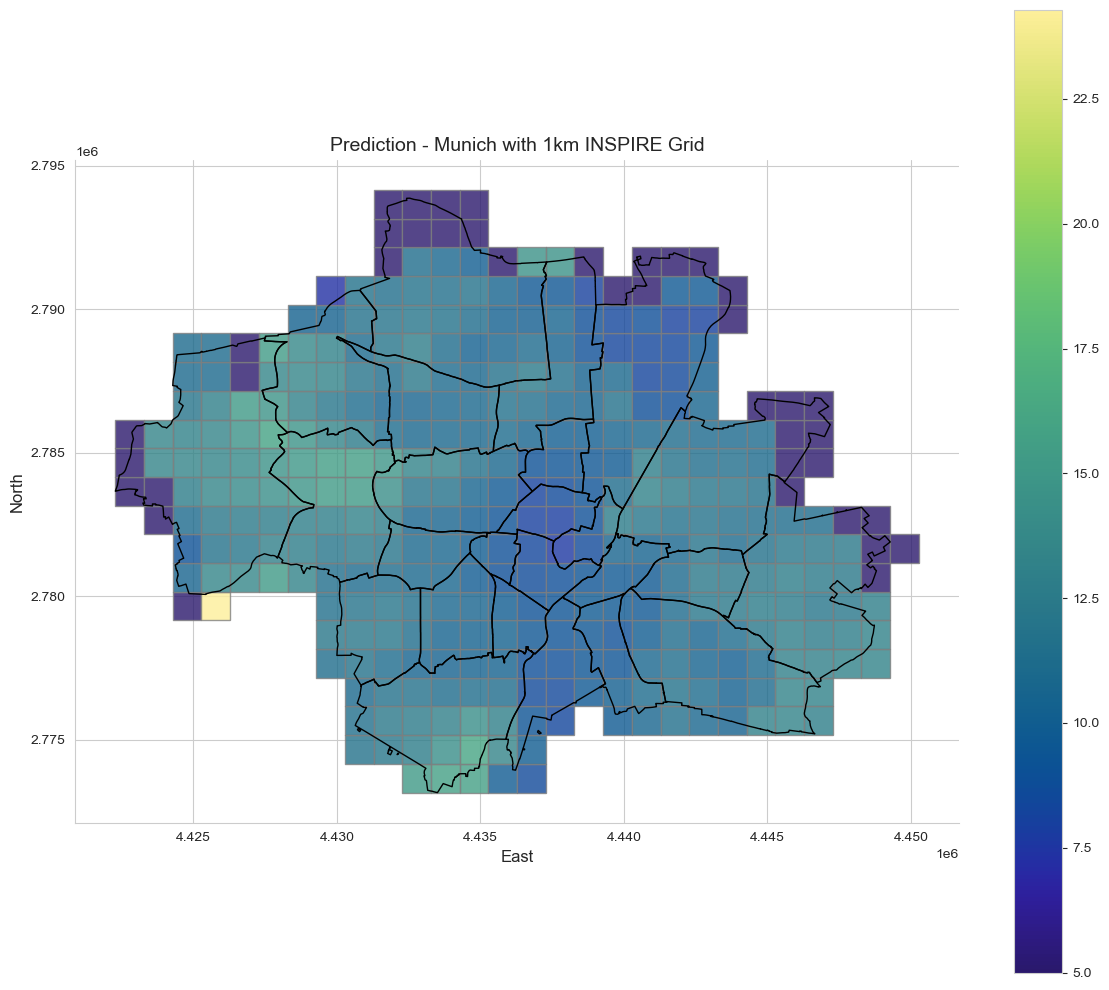

In [82]:
import cmocean 
# Plot the grid with bright blue to bright red colors
fig, ax = plt.subplots(figsize=(12, 10))
munich.boundary.plot(ax=ax, color='black', linewidth=1)

# Define a brighter blue-to-red colormap
colors = ["#a0d0ff", "#ff5555"]
bright_cmap = LinearSegmentedColormap.from_list('bright_blue_red', colors, N=256)

munich_grid.plot(column='predicted',
                ax=ax,
                edgecolor='gray',
                alpha=0.8,
                linewidth=1,
                legend=True,
                cmap=cmocean.cm.haline,
                vmin=5,    # Minimum value (dark blue)
                #vmax=30
                )      # Maximum value (bright red)

plt.title("Prediction - Munich with 1km INSPIRE Grid")
plt.ylabel('North')
plt.xlabel('East')
plt.tight_layout()
plt.show()

KeyError: 'predicted'

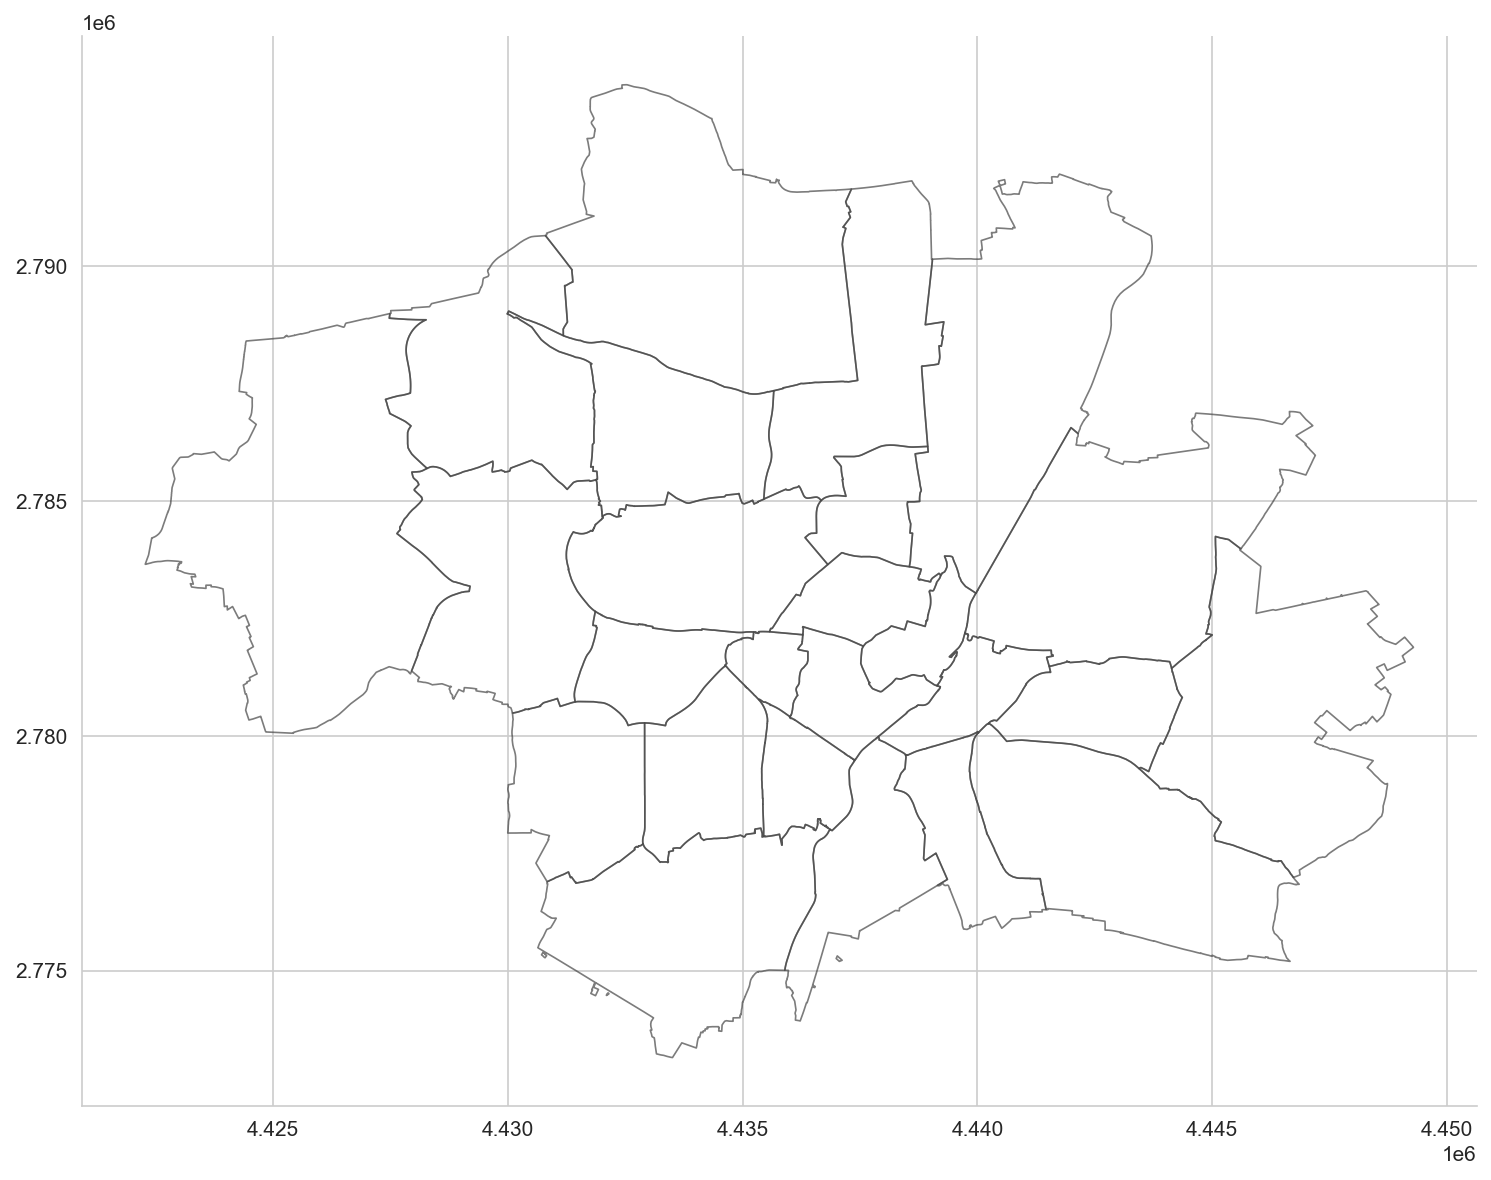

In [69]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
import seaborn as sns

# Set up a modern style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans'],
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.facecolor': 'white'
})

# Create figure
fig, ax = plt.subplots(figsize=(12, 10), dpi=150)

# Plot city boundaries
munich.boundary.plot(ax=ax, color='#444444', linewidth=0.8, alpha=0.7)

# Define colormap
colors = ["#ff5555", "#a0d0ff"]  # Red to Blue
bright_cmap = LinearSegmentedColormap.from_list('bright_blue_red', colors, N=256)

# Define normalization explicitly
norm = Normalize(vmin=-40, vmax=0)

# Plot the grid
munich_grid.plot(column='predicted',
                ax=ax,
                edgecolor='#dddddd',
                alpha=0.85,
                linewidth=0.5,
                legend=False,
                cmap=bright_cmap,
                norm=norm)  # Use explicit normalization

# Set background color
ax.set_facecolor('#f5f5f5')

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=bright_cmap, norm=norm)
sm.set_array([])

# Add colorbar with proper ticks
cbar = fig.colorbar(sm, ax=ax, shrink=0.7, pad=0.02)
cbar.set_label('Difference (Predicted - Actual)', fontsize=11)
cbar.set_ticks([-40, -30, -20, -10, 0])  # Set specific ticks
cbar.ax.tick_params(labelsize=10)

# Title and labels
ax.set_title("Prediction vs. Actual Difference (Munich)", fontsize=14, pad=20, fontweight='bold')
ax.set_xlabel('East', fontsize=11)
ax.set_ylabel('North', fontsize=11)

# Remove axis ticks for cleaner look
ax.xaxis.set_tick_params(which='both', labelbottom=False, bottom=False)
ax.yaxis.set_tick_params(which='both', labelleft=False, left=False)

# Optimize layout
plt.tight_layout()

# Add source note
plt.figtext(0.01, 0.01, "Source: 1km INSPIRE Grid Analysis", fontsize=8, color='gray')
plt.savefig('munich_difference_map.png', 
            dpi=800,              # Set resolution to 800 DPI
            format='png',         # Specify PNG format
            bbox_inches='tight',  # Trim white space around the figure
            pad_inches=0.1)       # Add small padding around trimmed figure
plt.show()

<Figure size 640x480 with 0 Axes>

In [26]:
munich_grid

,cell_id,geometry,mietekalt
0,1km_4422780E_2783654N,"POLYGON ((4423280 2783154, 4423280 2784154, 44...",0.000000
1,1km_4422780E_2784654N,"POLYGON ((4423280 2784154, 4423280 2785154, 44...",1200.000000
2,1km_4422780E_2785654N,"POLYGON ((4423280 2785154, 4423280 2786154, 44...",1200.000000
3,1km_4423780E_2782654N,"POLYGON ((4424280 2782154, 4424280 2783154, 44...",0.000000
4,1km_4423780E_2783654N,"POLYGON ((4424280 2783154, 4424280 2784154, 44...",691.666667
...,...,...,...
363,1km_4448780E_2779654N,"POLYGON ((4449280 2779154, 4449280 2780154, 44...",983.358434
364,1km_4448780E_2780654N,"POLYGON ((4449280 2780154, 4449280 2781154, 44...",986.461600
365,1km_4448780E_2781654N,"POLYGON ((4449280 2781154, 4449280 2782154, 44...",974.388182
366,1km_4448780E_2782654N,"POLYGON ((4449280 2782154, 4449280 2783154, 44...",0.000000


In [13]:
gdf_poly

,plz,mietekalt,nebenkosten,heizkosten,baujahr,letzte_modernisierung,wohnflaeche,nutzflaeche,etage,anzahletagen,...,edat,rent_sqm,easting,northing,len_ergg,x_idx,y_idx,x,y,geometry
obid,,,,,,,,,,,,,,,,,,,,,
40804900,21079,499.00,77,Other missing,NaN,Other missing,65.000000,65,1,1,...,2007m3,7.676923,4321,3369,9,4321,3369,4321500,3369500,"POLYGON ((4322000 3369000, 4322000 3370000, 43..."
40387914,21031,481.18,147,Other missing,2000.0,Other missing,63.549999,Other missing,2,Other missing,...,2007m1,7.571676,4335,3376,9,4335,3376,4335500,3376500,"POLYGON ((4336000 3376000, 4336000 3377000, 43..."
41925785,20535,264.66,130,Other missing,NaN,Other missing,47.259998,Other missing,1,Other missing,...,2007m6,5.600085,4323,3383,9,4323,3383,4323500,3383500,"POLYGON ((4324000 3383000, 4324000 3384000, 43..."
41517570,22041,783.00,Other missing,Other missing,NaN,Other missing,87.000000,Other missing,Other missing,Other missing,...,2007m6,9.000000,4327,3384,9,4327,3384,4327500,3384500,"POLYGON ((4328000 3384000, 4328000 3385000, 43..."
41720431,20099,1450.00,320,140,2007.0,Other missing,119.000000,40,5,5,...,2007m6,12.184874,4322,3382,9,4322,3382,4322500,3382500,"POLYGON ((4323000 3382000, 4323000 3383000, 43..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143723128,4157,890.00,Other missing,Other missing,1997.0,Other missing,52.000000,Other missing,3,Other missing,...,2023m7,17.115385,4486,3142,9,4486,3142,4486500,3142500,"POLYGON ((4487000 3142000, 4487000 3143000, 44..."
142571959,4318,345.00,150,Other missing,NaN,Other missing,50.000000,Other missing,3,Other missing,...,2023m5,6.900000,4489,3139,9,4489,3139,4489500,3139500,"POLYGON ((4490000 3139000, 4490000 3140000, 44..."
147969338,4317,594.98,75,119,2023.0,Other missing,50.320000,Other missing,5,Other missing,...,2023m12,11.823927,4488,3138,9,4488,3138,4488500,3138500,"POLYGON ((4489000 3138000, 4489000 3139000, 44..."


C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14940\3822215923.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  munich_grid = grid[grid.intersects(munich.unary_union)]


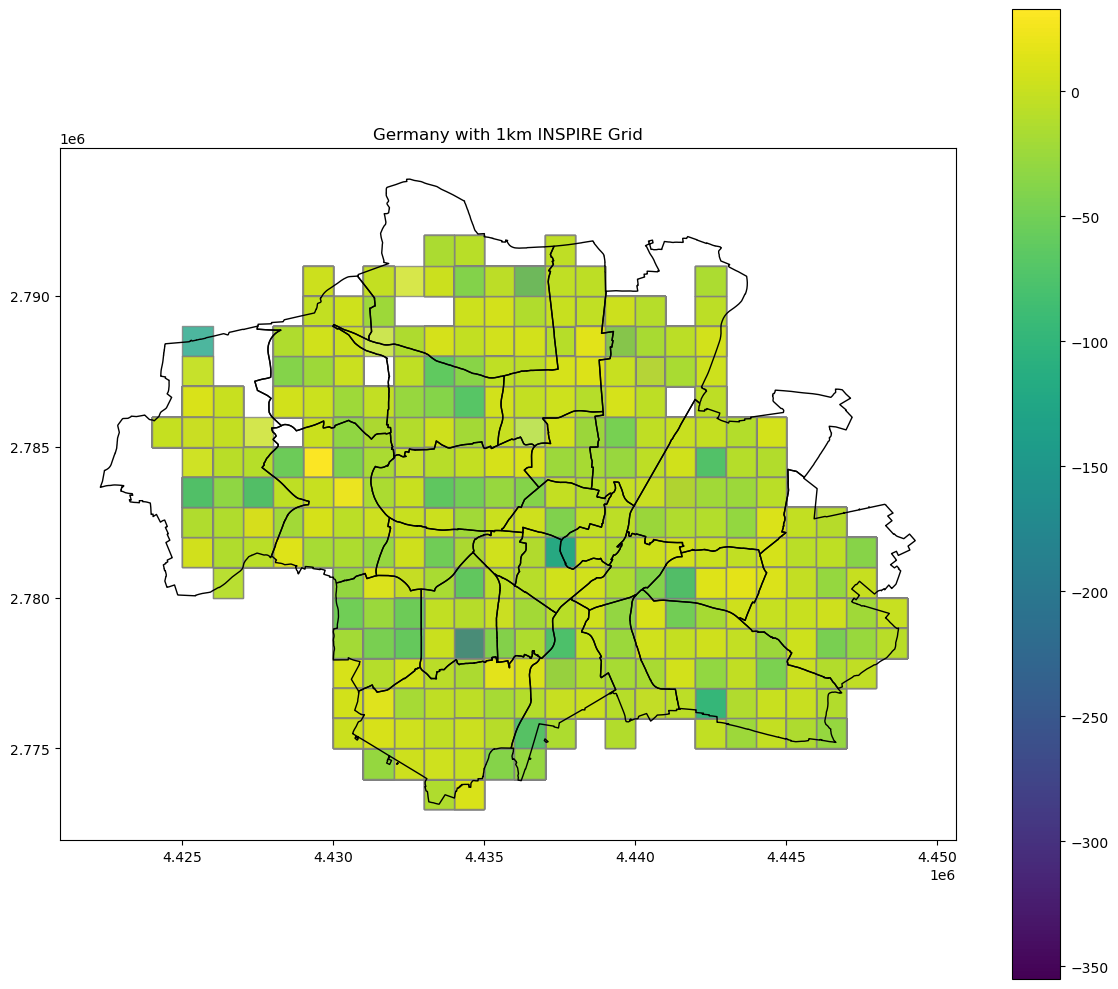

In [44]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
import matplotlib.pyplot as plt

munich = gpd.read_file("Data/Shapefile/StadtMuenchen/Muenchen_Stadtbezirke.json")

# Step 2: Reproject to ETRS89-LAEA (EPSG:3035) as per INSPIRE guidelines
munich = munich.to_crs(epsg=3035)

# Step 3: Create a grid with 1km cells
xmin, ymin, xmax, ymax = munich.total_bounds
cell_size = 1000  # 1km in meters

# Create the grid cells
grid_cells = []
for x0 in range(int(xmin), int(xmax + cell_size), cell_size):
    for y0 in range(int(ymin), int(ymax + cell_size), cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(box(x0, y0, x1, y1))

# Step 4: Create a GeoDataFrame from the grid
grid = gdf_poly

# Step 5: Keep only cells that intersect with Germany
munich_grid = grid[grid.intersects(munich.unary_union)]

# Step 6: Add grid cell identifiers as per INSPIRE
# Create cell IDs based on coordinates (following the INSPIRE grid naming convention)
munich_grid['cell_id'] = [f"1km_{int(geom.centroid.x)}E_{int(geom.centroid.y)}N" for geom in munich_grid.geometry]

# Step 7: Plot the grid
fig, ax = plt.subplots(figsize=(12, 10))
munich.boundary.plot(ax=ax, color='black', linewidth=1)
munich_grid.plot(column = 'difference', ax=ax, edgecolor='gray', alpha=0.8, linewidth=1, legend=True)
plt.title("Germany with 1km INSPIRE Grid")
plt.tight_layout()
plt.show()

# Optional: Save the grid to a file
#munich_grid.to_file("germany_1km_inspire_grid.gpkg", driver="GPKG")

C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14940\583570371.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  munich_grid = grid[grid.intersects(munich.unary_union)].copy()


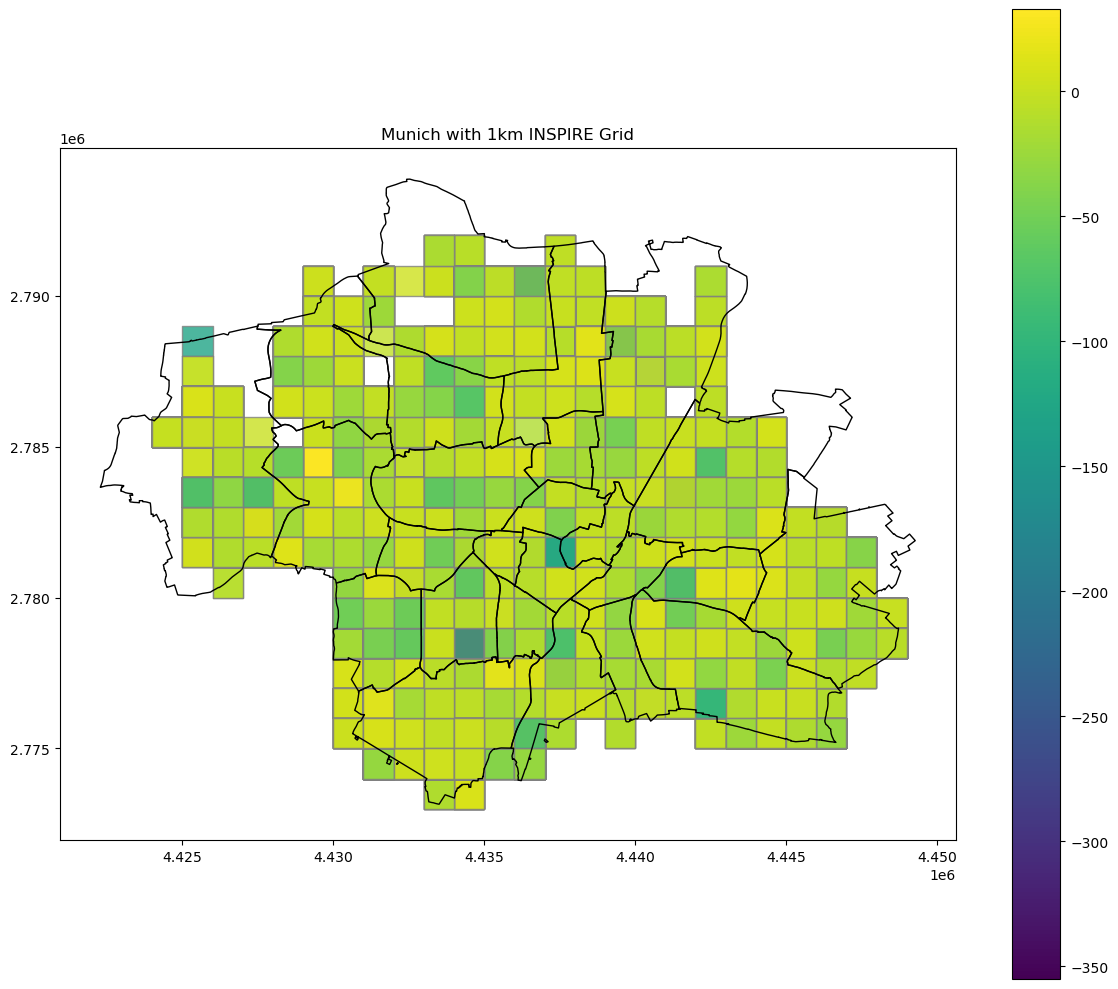

In [45]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
import matplotlib.pyplot as plt

# Load Munich city districts
munich = gpd.read_file("Data/Shapefile/StadtMuenchen/Muenchen_Stadtbezirke.json")

# Reproject to ETRS89-LAEA (EPSG:3035)
munich = munich.to_crs(epsg=3035)

# Create a 1km grid
xmin, ymin, xmax, ymax = munich.total_bounds
cell_size = 1000  # 1km in meters

grid_cells = []
for x0 in range(int(xmin), int(xmax + cell_size), cell_size):
    for y0 in range(int(ymin), int(ymax + cell_size), cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(box(x0, y0, x1, y1))

# Create a GeoDataFrame for the grid
grid = gdf_poly

# Keep only grid cells intersecting with Munich
munich_grid = grid[grid.intersects(munich.unary_union)].copy()

# Add cell identifiers
munich_grid['cell_id'] = [f"1km_{int(geom.centroid.x)}E_{int(geom.centroid.y)}N" for geom in munich_grid.geometry]

# Load observational data (assuming it exists in 'mietekalt')
if 'difference' in munich.columns:
    observations = munich[['geometry', 'difference']]
    
    # Spatial join to assign observations to grid cells
    joined = gpd.sjoin(observations, munich_grid, how='left', predicate='intersects')
    
    # Aggregate multiple observations within the same grid cell (taking the mean)
    aggregated = joined.groupby('cell_id').agg({'difference': 'mean'}).reset_index()
    
    # Merge aggregated values back into the grid
    munich_grid = munich_grid.merge(aggregated, on='cell_id', how='left')
    munich_grid['difference'] = munich_grid['difference'].fillna(0)  # Assign 0 to missing values

# Plot the grid
fig, ax = plt.subplots(figsize=(12, 10))
munich.boundary.plot(ax=ax, color='black', linewidth=1)
munich_grid.plot(column='difference', ax=ax, edgecolor='gray', alpha=0.8, linewidth=1, legend=True)
plt.title("Munich with 1km INSPIRE Grid")
plt.tight_layout()
plt.show()

# Save to file
#munich_grid.to_file("munich_1km_inspire_grid.gpkg", driver="GPKG")

In [107]:
munich_grid['ergg2019']

KeyError: 'ergg2019'

In [106]:
munich_grid['gid2019']

obid
44089776     9162000
42544376     9162000
40424568     9162000
42858569     9162000
41086278     9162000
              ...   
145258778    9162000
142321253    9162000
140013144    9162000
143622055    9162000
140901388    9162000
Name: gid2019, Length: 14637, dtype: int64

In [96]:
data_hk_cities[['kaufpreis', 'geometry']]

,kaufpreis,geometry
obid,,
43282109,219700.0,"POLYGON ((4318000 3370000, 4318000 3371000, 43..."
40500064,447000.0,"POLYGON ((4334000 3367000, 4334000 3368000, 43..."
39823119,209493.0,"POLYGON ((4333000 3388000, 4333000 3389000, 43..."
42069551,489000.0,"POLYGON ((4327000 3394000, 4327000 3395000, 43..."
42741328,320000.0,"POLYGON ((4326000 3388000, 4326000 3389000, 43..."
...,...,...
140792848,695000.0,"POLYGON ((4483000 3143000, 4483000 3144000, 44..."
138461041,781900.0,"POLYGON ((4491000 3143000, 4491000 3144000, 44..."
144723010,395000.0,"POLYGON ((4480000 3139000, 4480000 3140000, 44..."


In [ ]:
munich_grid

,geometry,cell_id
10,"POLYGON ((4423280 2783154, 4423280 2784154, 44...",1km_4422780E_2783654N
11,"POLYGON ((4423280 2784154, 4423280 2785154, 44...",1km_4422780E_2784654N
12,"POLYGON ((4423280 2785154, 4423280 2786154, 44...",1km_4422780E_2785654N
31,"POLYGON ((4424280 2782154, 4424280 2783154, 44...",1km_4423780E_2782654N
32,"POLYGON ((4424280 2783154, 4424280 2784154, 44...",1km_4423780E_2783654N
...,...,...
578,"POLYGON ((4449280 2779154, 4449280 2780154, 44...",1km_4448780E_2779654N
579,"POLYGON ((4449280 2780154, 4449280 2781154, 44...",1km_4448780E_2780654N
580,"POLYGON ((4449280 2781154, 4449280 2782154, 44...",1km_4448780E_2781654N
581,"POLYGON ((4449280 2782154, 4449280 2783154, 44...",1km_4448780E_2782654N


In [ ]:
pd.read_csv("Data\municipal_main\municipal_main.csv")

,ID,AGS,ARS,GEN,lan_name,east_west,fuaname_core,fuaname_comm,KFL_2021,bs_2005,...,Discontinous_low_dense_urban_2018,Isolated_strcutures_2018,Discontinous_dense_urban_2018,Green_urban_area_2018,Industrial_commercial_2018,Discontinous_medium_dense_urban_2018,Discontinous_very_low_dense_urban_2018,Land_no_current_use_2018,Fast_transit_roads_2018,Airports_2018
0,1,1051001.0,1.051518e+10,Albersdorf,Schleswig-Holstein,West,NaN,NaN,17.12,422018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1051002.0,1.051518e+10,Arkebek,Schleswig-Holstein,West,NaN,NaN,6.92,45613.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1051003.0,1.051516e+10,Averlak,Schleswig-Holstein,West,NaN,NaN,9.06,95403.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1051004.0,1.051518e+10,Bargenstedt,Schleswig-Holstein,West,NaN,NaN,11.90,156547.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1051005.0,1.051517e+10,Barkenholm,Schleswig-Holstein,West,NaN,NaN,5.11,36667.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10990,10991,16052000.0,1.605200e+11,Gera,Thüringen,East,Gera,NaN,152.18,6380840.0,...,6773000.0,353000.0,4288900.0,1838500.0,9035800.0,4856900.0,1979800.0,259400.0,518500.0,385800.0
10991,10992,16053000.0,1.605300e+11,Jena,Thüringen,East,Jena,NaN,114.77,4626010.0,...,1825300.0,81000.0,4855000.0,1980900.0,9938900.0,3032200.0,995200.0,55700.0,433600.0,0.0
10992,10993,16054000.0,1.605400e+11,Suhl,Thüringen,East,NaN,NaN,141.62,2709905.0,...,651800.0,50000.0,148000.0,33700.0,264800.0,282600.0,7700.0,35600.0,0.0,0.0
10993,10994,16055000.0,1.605500e+11,Weimar,Thüringen,East,Weimar,NaN,84.48,3641181.0,...,210600.0,180500.0,3814600.0,3226800.0,6441900.0,1279800.0,9000.0,208100.0,191700.0,0.0


In [ ]:
data_hk_cities[['gid2019', 'kid2019']]

,gid2019,kid2019
obid,,
43282109,2000000,2000
40358201,2000000,2000
40500064,2000000,2000
43592240,2000000,2000
37597406,2000000,2000
...,...,...
140792848,14713000,14713
138461041,14713000,14713
144723010,14713000,14713


In [ ]:
print(munich_grid['geometry'][11])

POLYGON ((4423280 2784154, 4423280 2785154, 4422280 2785154, 4422280 2784154, 4423280 2784154))


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box
import contextily as ctx

# Step 1: Load Munich boundaries
munich = gpd.read_file("Data/Shapefile/StadtMuenchen/Muenchen_Stadtbezirke.json")

# Step 2: Reproject to ETRS89-LAEA (EPSG:3035) as per INSPIRE guidelines
munich = munich.to_crs(epsg=3035)

# Step 3: Create a grid with 1km cells
xmin, ymin, xmax, ymax = munich.total_bounds
cell_size = 1000  # 1km in meters

# Create the grid cells
grid_cells = []
grid_ids = []

for x0 in range(int(xmin), int(xmax + cell_size), cell_size):
    for y0 in range(int(ymin), int(ymax + cell_size), cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(box(x0, y0, x1, y1))
        
        # Create INSPIRE grid ID (you'll need to adapt this to match your data format)
        inspire_id = f"{int(x0)}_{int(y0)}"
        grid_ids.append(inspire_id)

# Step 4: Create a GeoDataFrame from the grid
grid = gpd.GeoDataFrame({'grid_id': grid_ids, 'geometry': grid_cells}, crs=munich.crs)

# Step 5: Keep only cells that intersect with Munich
munich_grid = grid[grid.intersects(munich.unary_union)]

# Step 6: Load your data that maps to the INSPIRE grid cells
# Assuming your data is in a CSV with columns 'grid_id' and 'value'
# Replace with your actual data loading code
your_data = data_hk_cities

# Step 7: Merge your data with the grid
munich_grid = munich_grid.merge(data_hk_cities, on='grid_id', how='left')

# Step 8: Create the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Convert to Web Mercator for basemap compatibility
munich_grid_wm = munich_grid.to_crs(epsg=3857)
munich_wm = munich.to_crs(epsg=3857)

# Plot grid cells with values
munich_grid_wm.plot(column='value', ax=ax, cmap='Blues', 
                   legend=True, alpha=0.7,
                   legend_kwds={'label': 'Your Value', 'orientation': 'vertical'})

# Plot Munich boundaries on top
munich_wm.boundary.plot(ax=ax, color='black', linewidth=1)

# Add a basemap for context (like in your example)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Title and layout
plt.title("Munich 1km INSPIRE Grid Values")
plt.tight_layout()
plt.savefig("munich_grid_map.png", dpi=300)
plt.show()

C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_11976\1072024901.py:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  munich_grid = grid[grid.intersects(munich.unary_union)]


KeyError: 'grid_id'

In [ ]:
german_grid

,geometry,cell_id
10,"POLYGON ((4423280 2783154, 4423280 2784154, 44...",1km_4422780E_2783654N
11,"POLYGON ((4423280 2784154, 4423280 2785154, 44...",1km_4422780E_2784654N
12,"POLYGON ((4423280 2785154, 4423280 2786154, 44...",1km_4422780E_2785654N
31,"POLYGON ((4424280 2782154, 4424280 2783154, 44...",1km_4423780E_2782654N
32,"POLYGON ((4424280 2783154, 4424280 2784154, 44...",1km_4423780E_2783654N
...,...,...
578,"POLYGON ((4449280 2779154, 4449280 2780154, 44...",1km_4448780E_2779654N
579,"POLYGON ((4449280 2780154, 4449280 2781154, 44...",1km_4448780E_2780654N
580,"POLYGON ((4449280 2781154, 4449280 2782154, 44...",1km_4448780E_2781654N
581,"POLYGON ((4449280 2782154, 4449280 2783154, 44...",1km_4448780E_2782654N
